In [1]:
from pathlib import Path
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %matplotlib inline
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import pandas as pd 
import geopandas as gpd
import pygeos
import seaborn as sns
import xarray as xr
import rioxarray as rio
from matplotlib.colors import LinearSegmentedColormap
import datetime
from datetime import timedelta
from scipy.spatial.distance import cdist
from math import dist
from scipy.stats import ttest_ind
from geopy import distance
from scipy import stats
from matplotlib.gridspec import GridSpec
from pylr2 import regress2
from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)
from matplotlib.ticker import MaxNLocator,FixedLocator
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde

# import shutil

/Users/weitao/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Multi-axis
validata = pd.read_pickle('Pandora/ValidataMD2')
# Direct-sun
# validata = pd.read_pickle('Pandora/ValidataDS2')

# Quality Control

In [3]:
pandora3 = validata.copy()
pandora3['Location']=pandora3['loca']
seasonDict = {3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',
             12:'Winter',1:'Winter',2:'Winter'}
# seasonDict = {'03':'Spring','04':'Spring','05':'Spring','06':'Summer','07':'Summer','08':'Summer','09':'Autumn','10':'Autumn','11':'Autumn',
#              '12':'Winter','01':'Winter','02':'Winter'}
pandora3['Season'] = pandora3['Month'].map(seasonDict)
pandora3

,VCD(moles/m2),Lat,Lon,Hour,time,loca,datetime,GEMS,AMFCloudFraction,SolarZenithAngle,...,u,v,Wind_velocity,vcd0,ratio,VCD,DVCD,Month,Location,Season
56229,0.000219,37.4580,126.9510,1,2023053001,Seoul-SNU,2023-05-30 01:45:00,3.809300,0.297231,26.126650,...,-4.368670,-0.473523,4.394258,6.242646,1.638791,13.213171,-2.433346,5,Seoul-SNU,Spring
46448,0.000088,37.4580,126.9510,2,2023020802,Seoul-SNU,2023-02-08 02:45:00,3.825949,0.205094,54.045593,...,3.227090,-3.708272,4.915830,3.645829,0.952922,5.270003,0.180120,2,Seoul-SNU,Winter
6177,0.000357,37.4580,126.9510,6,2021090906,Seoul-SNU,2021-09-09 06:45:00,7.731202,0.090146,55.997890,...,1.090323,1.383768,1.761709,8.357835,1.081052,21.510885,-0.626633,9,Seoul-SNU,Autumn
662,0.000085,37.4580,126.9510,1,2021030501,Seoul-SNU,2021-03-05 01:45:00,-1.100536,0.146820,50.591850,...,1.798763,-3.302179,3.760311,4.158397,-3.778521,5.120085,-5.258932,3,Seoul-SNU,Spring
39472,0.000054,37.4580,126.9510,1,2022102601,Seoul-SNU,2022-10-26 01:45:00,9.187380,0.203542,53.573238,...,-0.623659,2.278356,2.362172,6.078684,0.661634,3.259227,3.108696,10,Seoul-SNU,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23022,0.000120,36.0506,140.1202,1,2022051801,Tsukuba-NIES-West,2022-05-18 01:45:00,7.801951,0.059065,19.863686,...,-0.521046,0.998883,1.126613,6.619256,0.848410,7.234831,1.182695,5,Tsukuba-NIES-West,Spring
14553,0.000041,36.0506,140.1202,2,2022021802,Tsukuba-NIES-West,2022-02-18 02:45:00,6.889956,0.164267,47.767956,...,3.840096,-6.670386,7.697639,3.479825,0.505058,2.486996,3.410131,2,Tsukuba-NIES-West,Winter
24607,0.000085,36.0506,140.1202,22,2022053122,Tsukuba-NIES-West,2022-05-31 22:45:00,4.097235,0.042868,49.611576,...,2.472115,-1.921503,3.131059,5.562957,1.357735,5.124963,-1.465723,5,Tsukuba-NIES-West,Spring
15374,0.000117,36.0506,140.1202,2,2022022702,Tsukuba-NIES-West,2022-02-27 02:45:00,6.977103,0.156220,44.469715,...,9.363667,3.545740,10.019752,3.179444,0.455697,7.057483,3.797659,2,Tsukuba-NIES-West,Winter


In [4]:
sde = pd.DataFrame(columns = ['Location','PandoraVCD','GEMS_VCD', 'PandoraSD', 'GEMS_SD', 'PandoraSDE', 'GEMS_SDE'])
pandoraa = pandora3[pandora3['GEMS']>0]
pandoraa = pandoraa[pandoraa['VCD']>0]
for i in list(pandora3['Location'].unique()):
    temp = pandoraa[pandoraa['Location']==i]
    mean1 = temp['VCD'].mean()
    mean2 = temp['GEMS'].mean()
    std1 = np.std(temp['VCD'])
    std2 = np.std(temp['GEMS'])
    stderr1 = stats.sem(temp['VCD'])
    stderr2 = stats.sem(temp['GEMS'])
    sde.loc[len(sde.index)] = [i, mean1,mean2,std1, std2,stderr1,stderr2]
sde

,Location,PandoraVCD,GEMS_VCD,PandoraSD,GEMS_SD,PandoraSDE,GEMS_SDE
0,Seoul-SNU,9.517001,8.005967,6.135915,4.579226,0.109535,0.081746
1,Seoul,8.679867,7.682179,4.817289,4.352210,0.107051,0.096716
2,Dalanzadgad,2.829895,4.314422,1.371297,2.715510,0.034553,0.068424
3,Seosan,7.502256,7.241183,4.966890,4.143075,0.091139,0.076023
4,Bangkok,13.386978,10.951956,5.256891,5.022436,0.095580,0.091317
5,Tsukuba-NIES,6.118782,5.497126,3.883475,3.295149,0.105656,0.089649
6,Nagoya,5.693566,5.709582,3.635797,3.528884,0.107167,0.104016
7,Incheon-ESC,8.797843,8.137752,5.095165,4.104234,0.160403,0.129207
8,Busan,6.318842,7.712211,4.816359,4.552027,0.134674,0.127283
9,Fukuoka,6.385828,6.810729,3.080085,3.808424,0.077099,0.095330


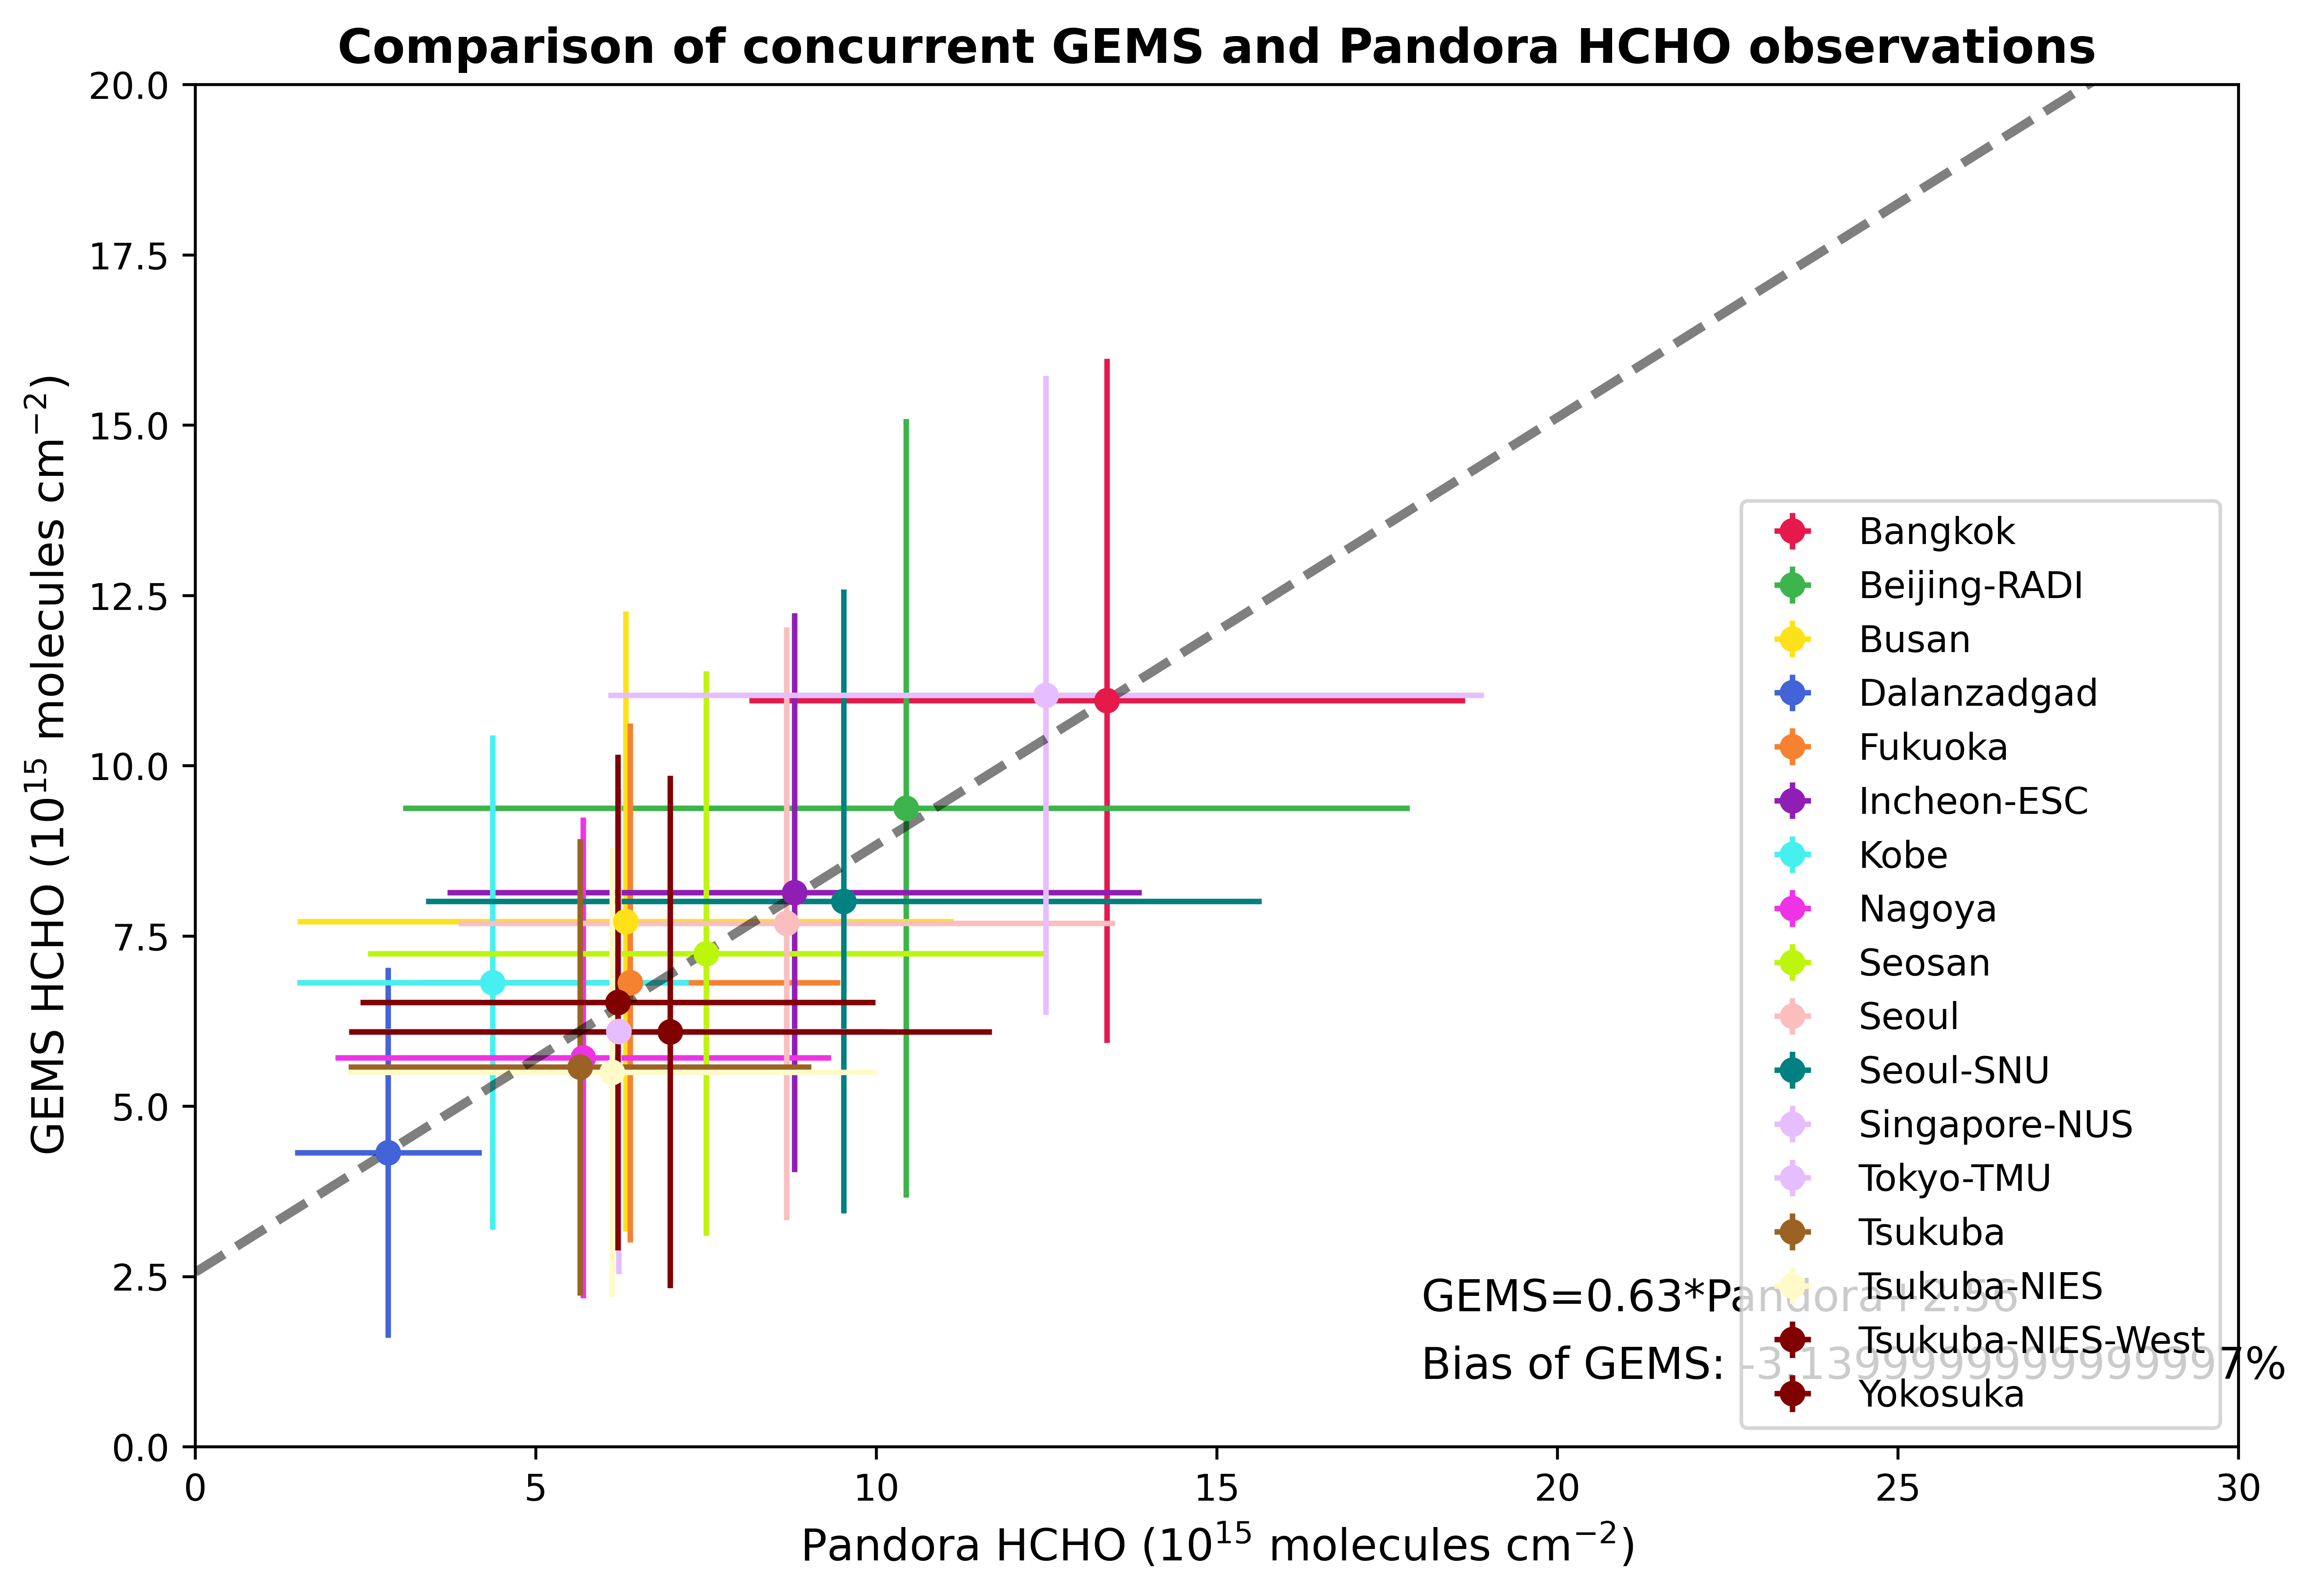

In [5]:
plt.rcParams['figure.dpi']=600
sde=sde.sort_values('Location')
# colors = ['#e6194B','#f58231', '#ffe119', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#800000', '#9A6324', '#469990','#dcbeff','#dcbeff','#dcbeff', '#000075']
# https://sashamaps.net/docs/resources/20-colors/
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#e6beff',  '#9a6324', '#fffac8', '#800000','#800000','#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',]
count = 0
plt.figure(figsize=(10,10))
for i in list(sde['Location'].unique()):
    temp = sde[sde['Location']==i]
    
    plt.errorbar(temp['PandoraVCD'], temp['GEMS_VCD'],
             yerr=[temp['GEMS_SD'],temp['GEMS_SD']],
             xerr=[temp['PandoraSD'],temp['PandoraSD']],
             fmt='o',
                 color=colors[count],
                 label=i)
    count=count+1
    
b, a = np.polyfit(sde['PandoraVCD'], sde['GEMS_VCD'], deg=1)
xseq = np.linspace(0, 30, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5,alpha=0.5,ls='--');

bis = (sde['GEMS_VCD'].mean()-sde['PandoraVCD'].mean())/sde['PandoraVCD'].mean()

plt.text(18,2,'GEMS='+str(round(b,2))+'*Pandora+'+str(round(a,2)),size=12)
plt.text(18,1,'Bias of GEMS: '+str(round(bis,4)*100)+'%',size=12)
# axs[count1].text(18,1,'Bias of GEMS: '+str(round(bis,4)*100)+'%',size=10)
plt.xlim(0, 30)
plt.ylim(0, 20)
plt.gca().set_aspect('equal', 'box')
plt.title("Comparison of concurrent GEMS and Pandora HCHO observations",size=13, weight = 'bold')
plt.xlabel('Pandora HCHO (10$^{15}$ molecules cm$^{-2}$)',size=12)
plt.ylabel('GEMS HCHO (10$^{15}$ molecules cm$^{-2}$)',size=12)

# plt.figure(figsize=(8, 8), dpi=300)
plt.legend(fontsize='medium')

In [6]:
sde2 = pd.DataFrame(columns = ['Location','Season','PandoraVCD','GEMS_VCD', 'PandoraSD', 'GEMS_SD', 'PandoraSDE', 'GEMS_SDE'])
pandoraa = pandora3[pandora3['GEMS']>0]
pandoraa = pandoraa[pandoraa['VCD']>0]
for i in list(pandora3['Location'].unique()):
    temp = pandoraa[pandoraa['Location']==i]
    for j in list(temp['Season'].unique()):
        temp2 = temp[temp['Season']==j]
        mean1 = temp2['VCD'].mean()
        mean2 = temp2['GEMS'].mean()
        std1 = np.std(temp['VCD'])
        std2 = np.std(temp['GEMS'])
        stderr1 = stats.sem(temp['VCD'])
        stderr2 = stats.sem(temp['GEMS'])
        sde2.loc[len(sde2.index)] = [i, j,mean1,mean2,std1, std2,stderr1,stderr2]
sde2 = sde2.dropna()
print(len(sde2['Location']))

sde2.head(5)

67


,Location,Season,PandoraVCD,GEMS_VCD,PandoraSD,GEMS_SD,PandoraSDE,GEMS_SDE
0,Seoul-SNU,Spring,7.900427,6.961032,6.135915,4.579226,0.109535,0.081746
1,Seoul-SNU,Winter,4.355237,5.190309,6.135915,4.579226,0.109535,0.081746
2,Seoul-SNU,Autumn,7.646057,7.694153,6.135915,4.579226,0.109535,0.081746
3,Seoul-SNU,Summer,15.440382,10.877977,6.135915,4.579226,0.109535,0.081746
4,Seoul,Spring,7.974296,6.599386,4.817289,4.352210,0.107051,0.096716


In [7]:
stations =list(sde2.sort_values('Location')['Location'].unique())
stations

['Bangkok',
 'Beijing-RADI',
 'Busan',
 'Dalanzadgad',
 'Fukuoka',
 'Incheon-ESC',
 'Kobe',
 'Nagoya',
 'Seosan',
 'Seoul',
 'Seoul-SNU',
 'Singapore-NUS',
 'Tokyo-TMU',
 'Tsukuba',
 'Tsukuba-NIES',
 'Tsukuba-NIES-West',
 'Yokosuka']

In [8]:
pandora3 = validata.copy()
pandora3['Location']=pandora3['loca']
seasonDict = {3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',
             12:'Winter',1:'Winter',2:'Winter'}
# seasonDict = {'03':'Spring','04':'Spring','05':'Spring','06':'Summer','07':'Summer','08':'Summer','09':'Autumn','10':'Autumn','11':'Autumn',
#              '12':'Winter','01':'Winter','02':'Winter'}
pandora3['Season'] = pandora3['Month'].map(seasonDict)
pandora3

,VCD(moles/m2),Lat,Lon,Hour,time,loca,datetime,GEMS,AMFCloudFraction,SolarZenithAngle,...,u,v,Wind_velocity,vcd0,ratio,VCD,DVCD,Month,Location,Season
56229,0.000219,37.4580,126.9510,1,2023053001,Seoul-SNU,2023-05-30 01:45:00,3.809300,0.297231,26.126650,...,-4.368670,-0.473523,4.394258,6.242646,1.638791,13.213171,-2.433346,5,Seoul-SNU,Spring
46448,0.000088,37.4580,126.9510,2,2023020802,Seoul-SNU,2023-02-08 02:45:00,3.825949,0.205094,54.045593,...,3.227090,-3.708272,4.915830,3.645829,0.952922,5.270003,0.180120,2,Seoul-SNU,Winter
6177,0.000357,37.4580,126.9510,6,2021090906,Seoul-SNU,2021-09-09 06:45:00,7.731202,0.090146,55.997890,...,1.090323,1.383768,1.761709,8.357835,1.081052,21.510885,-0.626633,9,Seoul-SNU,Autumn
662,0.000085,37.4580,126.9510,1,2021030501,Seoul-SNU,2021-03-05 01:45:00,-1.100536,0.146820,50.591850,...,1.798763,-3.302179,3.760311,4.158397,-3.778521,5.120085,-5.258932,3,Seoul-SNU,Spring
39472,0.000054,37.4580,126.9510,1,2022102601,Seoul-SNU,2022-10-26 01:45:00,9.187380,0.203542,53.573238,...,-0.623659,2.278356,2.362172,6.078684,0.661634,3.259227,3.108696,10,Seoul-SNU,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23022,0.000120,36.0506,140.1202,1,2022051801,Tsukuba-NIES-West,2022-05-18 01:45:00,7.801951,0.059065,19.863686,...,-0.521046,0.998883,1.126613,6.619256,0.848410,7.234831,1.182695,5,Tsukuba-NIES-West,Spring
14553,0.000041,36.0506,140.1202,2,2022021802,Tsukuba-NIES-West,2022-02-18 02:45:00,6.889956,0.164267,47.767956,...,3.840096,-6.670386,7.697639,3.479825,0.505058,2.486996,3.410131,2,Tsukuba-NIES-West,Winter
24607,0.000085,36.0506,140.1202,22,2022053122,Tsukuba-NIES-West,2022-05-31 22:45:00,4.097235,0.042868,49.611576,...,2.472115,-1.921503,3.131059,5.562957,1.357735,5.124963,-1.465723,5,Tsukuba-NIES-West,Spring
15374,0.000117,36.0506,140.1202,2,2022022702,Tsukuba-NIES-West,2022-02-27 02:45:00,6.977103,0.156220,44.469715,...,9.363667,3.545740,10.019752,3.179444,0.455697,7.057483,3.797659,2,Tsukuba-NIES-West,Winter


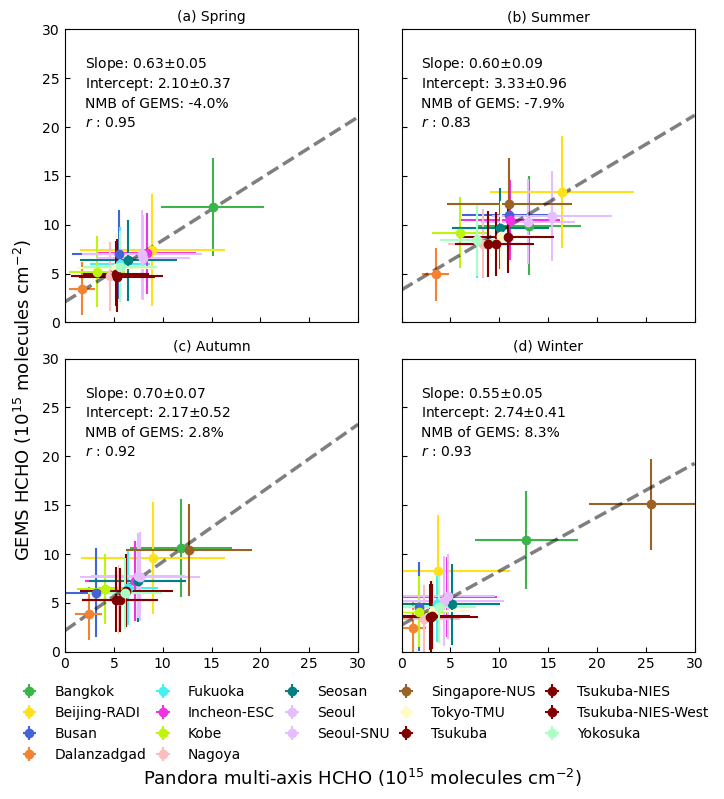

In [9]:


cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.dpi']=600
plt.style.use('default')
# Direct-Sun
# colors = colors = ['#e6194B','#f58231', '#ffe119', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#800000', '#9A6324', '#469990','#dcbeff','#dcbeff','#dcbeff', '#000075']
# Multi-Axis
colors = [
#     '#e6194b', # Agam
          '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
#     '#911eb4', # Dhaka
    '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#e6beff',  '#9a6324', '#fffac8', '#800000','#800000','#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',]

# stations = list(sde['Location'].unique())
# fig = plt.figure(layout="constrained", figsize=(18*cm, 18*cm))
fig = plt.figure(layout="constrained", figsize=(18*cm, 20*cm))

alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

gs = GridSpec(3, 2, figure=fig,height_ratios=[5,5,1.5])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
# ax5 = fig.add_subplot(gs[2, :])

extent = [60, 141, -8, 42.5]
axs = [ax1, ax2, ax3, ax4]

count1 = 0
for i in ['Spring','Summer','Autumn','Winter']:
    sub = sde2[sde2['Season']==i].copy()
    sub = sub[sub['Location'].isin(stations)]
    count2 = 0
    for j in stations:
        
        temp = sub[sub['Location']==j]
        if (count1==0):
            axs[count1].errorbar(temp['PandoraVCD'], temp['GEMS_VCD'],
                     yerr=[temp['GEMS_SD'],temp['GEMS_SD']],
                     xerr=[temp['PandoraSD'],temp['PandoraSD']],
                     fmt='o',
                         color=colors[count2],
                         label=j)
        else:
            axs[count1].errorbar(temp['PandoraVCD'], temp['GEMS_VCD'],
                     yerr=[temp['GEMS_SD'],temp['GEMS_SD']],
                     xerr=[temp['PandoraSD'],temp['PandoraSD']],
                     fmt='o',
                         color=colors[count2],
                         label=j)
        count2=count2+1
        
    xseq = np.linspace(0, 30, num=100)
## OLS    
#     b, a = np.polyfit(sub['PandoraVCD'], sub['GEMS_VCD'], deg=1)
#     axs[count1].plot(xseq, a + b * xseq, color="k", lw=2.5,alpha=0.5,ls='--');
#     axs[count1].text(2,22,'GEMS='+str(round(b,2))+'*Pandora+'+str(round(a,2)),size=10)

## Reduced Major Axis Regression
    results = regress2(sub['PandoraVCD'], sub['GEMS_VCD'], _method_type_2="reduced major axis")
    axs[count1].plot(xseq, results['intercept'] + results['slope'] * xseq, color="k", lw=2.5,alpha=0.5,ls='--');
    

    bis = (sub['GEMS_VCD'].mean()-sub['PandoraVCD'].mean())/sub['PandoraVCD'].mean()
    
#     axs[count1].text(2,22,'GEMS='+str(round(results['slope'],2))+'*Pandora+'+str(round(results['intercept'],2)),size=10)
#     axs[count1].text(2,20,'Bias of GEMS: '+str(round(round(bis,3)*100,1))+'%',size=10)
    axs[count1].text(2,26,'Slope: '+"{:.2f}".format(results['slope'])+ r'$\pm$' + "{:.2f}".format(results['std_slope']),size=10)
    axs[count1].text(2,24,'Intercept: '+"{:.2f}".format(results['intercept'])+ r'$\pm$' + "{:.2f}".format(results['std_intercept']),size=10)
    axs[count1].text(2,20,'$\it{r}$ : '+"{:.2f}".format(results['r']),size=10)
    axs[count1].text(2,22,'NMB of GEMS: '+"{:.1f}".format(bis*100)+'%',size=10)
    
    
#                      '*Pandora+'+str(round(results['intercept'],2)),size=10)
    
    axs[count1].set_title('('+alp[count1]+') '+i,size=10)    
    axs[count1].set_xlim(0, 30)
    axs[count1].set_ylim(0, 30)
    axs[count1].set_aspect('equal', 'box')
    axs[count1].tick_params(direction = 'in')  
    if (count1==0):
        axs[count1].tick_params(axis='y', direction = 'in')  
        axs[count1].tick_params(axis='x', labeltop=False, labelbottom=False, direction = 'in')
    elif (count1==1):
        axs[count1].tick_params(axis='y', labelright=False, labelleft=False, direction = 'in')
        axs[count1].tick_params(axis='x', labeltop=False, labelbottom=False, direction = 'in')
    elif (count1==3):
        axs[count1].tick_params(axis='y', labelright=False, labelleft=False, direction = 'in')
#     else:
#         axs[count1].tick_params(axis='y', labelright=False, labelleft=False, direction = 'in')
    count1 = count1+1
# axs[2].legend(fontsize=9,loc='lower right', bbox_to_anchor=(1.3, -3),ncol=6 )
# plt.suptitle("Comparison of coincident GEMS and Pandora HCHO observations",size=13, weight = 'bold')
fig.supxlabel('Pandora multi-axis HCHO (10$^{15}$ molecules cm$^{-2}$)',size=13)
fig.supylabel('GEMS HCHO (10$^{15}$ molecules cm$^{-2}$)',size=13)

handles, labels = ax2.get_legend_handles_labels()
# fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(0.5, -0.02),loc='lower center',ncol=5, borderaxespad=3,columnspacing=0.2,frameon=False)
# fig.legend(handles, labels, loc='outside center right',ncol=1, borderaxespad=-1,columnspacing=0.2)

# fig.savefig('samplefigure', bbox_inches='tight')